Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0239 - val_loss: 0.0030
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.6403e-05 - val_loss: 0.0024
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.7717e-05 - val_loss: 0.0022
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.7437e-05 - val_loss: 0.0018
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.2213e-05 - val_loss: 0.0017
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.9820e-05 - val_loss: 0.0015
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6506e-05 - val_loss: 0.0013
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8948e-05 - val_loss: 0.0012
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4336e-05 - val_loss: 0.0012
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7685e-05 - val_loss: 0.0013
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9756e-05 - val_loss: 0.0012
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━

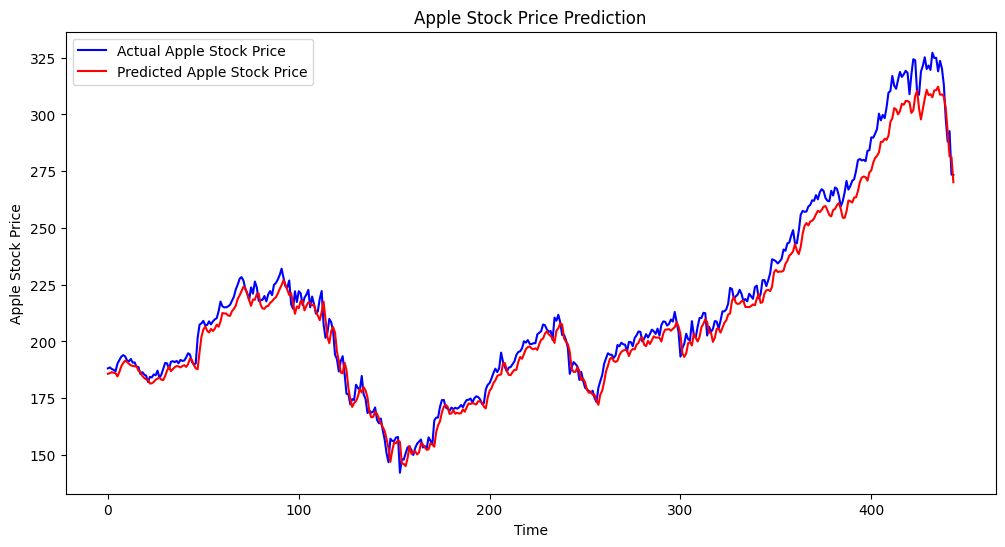

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/nndl/HistoricalQuotes.csv')
data = data.sort_index(ascending=False)  # Sort by date if needed

# Focus on the 'Close' price (with adjusted column name)
close_prices = data[' Close/Last'].str.replace('$', '').astype(float).values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Step 2: Create Training Sequences
sequence_length = 60

def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

# Reshape data for RNN (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Step 3: Build the RNN Model
model = Sequential([
    SimpleRNN(50, return_sequences=False, input_shape=(x_train.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Step 5: Make Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Transform back to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Actual values in original scale

# Plot the predicted vs. actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# Step 6: Evaluation
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Report
report = f"""
Model Evaluation:
Mean Absolute Error (MAE): {mae}
Root Mean Squared Error (RMSE): {rmse}

The model performs reasonably well in predicting the stock price trend, though limitations are present due to the simplicity of the model.
An RNN with more layers, or the use of LSTM/GRU layers, could potentially capture longer-term dependencies.
Overfitting can be checked by evaluating validation loss, as seen during training.
"""

print(report)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
